<a href="https://colab.research.google.com/github/realdanielalexander/diamonds_bangkit/blob/master/Diamonds_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Run this colab on tensorflow 2.x</h1>

In [0]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

<h1>Import relevant libraries</h1>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

<h1>Load dataset</h1>

In [0]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))
# Dataset is now stored in a Pandas Dataframe

## Define functions that build and train a model

This code block is taken from the 'Programming Exercise' module on Machine Learning Crash Course.


In [173]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


## Define plotting functions

This code block is taken from the 'Programming Exercise' module on Machine Learning Crash Course.

In [174]:
#@title Define the plotting function
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


<h1>Plot the correlation matrix</h1>

In [175]:
df.corr()

,carat,price
carat,1.000000,0.942197
price,0.942197,1.000000


From this correlation matrix, we can see that the biggest correlating variables are carat and price. So we're going to choose carat as a feature and price as the label. We found that correlation between carat with price and volume (x,y,z) are the highest. But, we decided to only chose 2 features so we chose carat and price.

<h1>Copy features and label to varable df</h1>

In [196]:
df = df_raw[['carat', 'price']].copy()
df = df.loc[df['price']<=5000]
df['price'] = df['price']/100
df

,carat,price
0,0.23,3.26
1,0.21,3.26
2,0.23,3.27
3,0.29,3.34
4,0.31,3.35
...,...,...
53935,0.72,27.57
53936,0.72,27.57
53937,0.70,27.57
53938,0.86,27.57


Text(0, 0.5, 'Price')

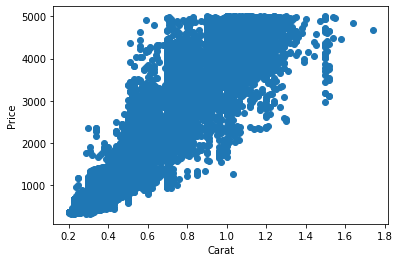

In [197]:
plt.scatter(df_try['carat'], df_try['price'])
plt.xlabel("Carat")
plt.ylabel("Price")

<h1>Examine the dataset</h1>

In [177]:
df.describe()

,carat,price
count,39226.000000,39226.000000
mean,0.572899,1914.472289
std,0.259138,1327.996299
min,0.200000,326.000000
25%,0.340000,801.000000
50%,0.510000,1417.000000
75%,0.730000,2826.000000
max,1.740000,5000.000000


Based on the description table, there are some anomalies on the data. The maximum value for both the feature and the label are much greater than its quantiles. There must be outliers in this dataset.

<h1>Splitting into training and testing data</h1>

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

In [179]:
train_df.shape

(31380, 2)

In [180]:
test_df.shape

(7846, 2)

<h1>Building the model and training it</h1>

On the first try, we started with a learning rate of .08 and 30 epochs, with a batch size of 100.

Epoch 1/30
252/252 [==============================] - 0s 2ms/step - loss: 5395547.0000 - root_mean_squared_error: 2316.6218 - val_loss: 5201863.0000 - val_root_mean_squared_error: 2281.9705
Epoch 2/30
252/252 [==============================] - 0s 2ms/step - loss: 5259685.0000 - root_mean_squared_error: 2288.0198 - val_loss: 5073014.5000 - val_root_mean_squared_error: 2253.5396
Epoch 3/30
252/252 [==============================] - 0s 2ms/step - loss: 5112516.0000 - root_mean_squared_error: 2259.6125 - val_loss: 4946364.5000 - val_root_mean_squared_error: 2225.2400
Epoch 4/30
252/252 [==============================] - 0s 2ms/step - loss: 4980502.5000 - root_mean_squared_error: 2231.1604 - val_loss: 4821350.5000 - val_root_mean_squared_error: 2196.9490
Epoch 5/30
252/252 [==============================] - 0s 2ms/step - loss: 4840164.5000 - root_mean_squared_error: 2202.7119 - val_loss: 4698523.5000 - val_root_mean_squared_error: 2168.7920
Epoch 6/30
252/252 [==============================

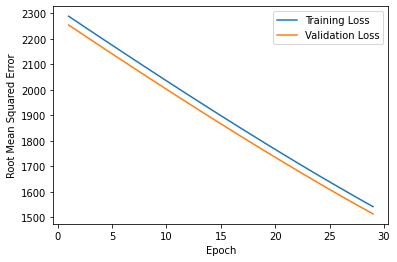

In [181]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Specify the feature and the label.
my_feature = "carat"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


As we can see here, the model hasn't fully converged, so we tried to increase the learning rate and number of epochs to 0.5 and 50 respectively

Epoch 1/50
252/252 [==============================] - 0s 2ms/step - loss: 4993931.5000 - root_mean_squared_error: 2237.8264 - val_loss: 4526641.0000 - val_root_mean_squared_error: 2128.7644
Epoch 2/50
252/252 [==============================] - 0s 2ms/step - loss: 4244051.0000 - root_mean_squared_error: 2062.2402 - val_loss: 3824638.5000 - val_root_mean_squared_error: 1956.7963
Epoch 3/50
252/252 [==============================] - 0s 2ms/step - loss: 3571038.2500 - root_mean_squared_error: 1892.6263 - val_loss: 3202350.7500 - val_root_mean_squared_error: 1790.5880
Epoch 4/50
252/252 [==============================] - 0s 2ms/step - loss: 2984816.2500 - root_mean_squared_error: 1729.5262 - val_loss: 2660271.0000 - val_root_mean_squared_error: 1632.0519
Epoch 5/50
252/252 [==============================] - 0s 2ms/step - loss: 2472361.5000 - root_mean_squared_error: 1574.6068 - val_loss: 2196540.7500 - val_root_mean_squared_error: 1483.0225
Epoch 6/50
252/252 [==============================

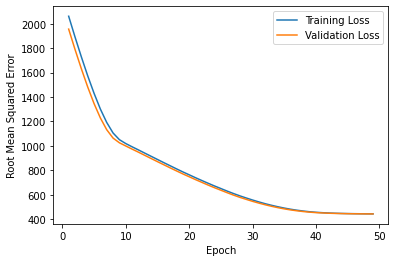

In [182]:
# The following variables are the hyperparameters.
learning_rate = 0.5
epochs = 50
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Specify the feature and the label.
my_feature = "carat"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


As seen on the plot above, the model has converged on 50 epochs, as the plot has flattened out. But we tried to increase the number of epochs to 100 just to be sure.

Epoch 1/100
252/252 [==============================] - 0s 2ms/step - loss: 5035129.0000 - root_mean_squared_error: 2238.5408 - val_loss: 4524262.5000 - val_root_mean_squared_error: 2128.2053
Epoch 2/100
252/252 [==============================] - 0s 2ms/step - loss: 4248844.0000 - root_mean_squared_error: 2063.2368 - val_loss: 3825905.0000 - val_root_mean_squared_error: 1957.1204
Epoch 3/100
252/252 [==============================] - 0s 2ms/step - loss: 3573702.7500 - root_mean_squared_error: 1893.2988 - val_loss: 3203656.7500 - val_root_mean_squared_error: 1790.9529
Epoch 4/100
252/252 [==============================] - 0s 2ms/step - loss: 3014500.2500 - root_mean_squared_error: 1729.5579 - val_loss: 2658210.5000 - val_root_mean_squared_error: 1631.4199
Epoch 5/100
252/252 [==============================] - 0s 2ms/step - loss: 2490554.2500 - root_mean_squared_error: 1575.4169 - val_loss: 2198005.5000 - val_root_mean_squared_error: 1483.5170
Epoch 6/100
252/252 [========================

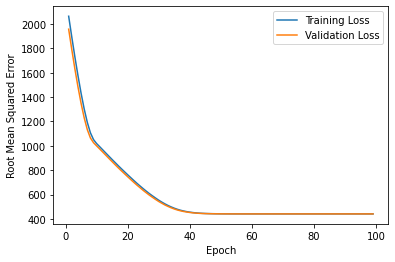

In [183]:
# The following variables are the hyperparameters.
learning_rate = 0.5
epochs = 100
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Specify the feature and the label.
my_feature = "carat"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


100 epochs is too large, so we decided with 50 epochs as executed in the training run.<br>
learning_rate = 0.5<br>
epochs = 50<br>
batch_size = 100<br>

In [207]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = train_df.sample(n=10000)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 1
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the create_model and traing_model functions.
Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/50
432/432 [==============================] - 1s 1ms/step - loss: 29533500.0000 - root_mean_squared_error: 5435.4526
Epoch 2/50
432/432 [==============================] - 1s 1ms/step - loss: 26082104.0000 - root_mean_squared_error: 5107.4795
Epoch 3/50
432/432 [==============================] - 1s 1ms/step - loss: 22957680.0000 - root_mean_squared_error: 4791.7734
Epoch 4/50
432/432 [==============================] - 0s 1ms/step - loss: 20157816.0000 - root_mean_squared_error: 4489.2505
Epoch 5/50
432/432 [==============================] - 1s 1ms/step - loss: 17662642.0000 - root_mean_squared_error: 4203.1763
Epoch 6/50
432/432 [==============================] - 1s 1ms/step - loss: 15498312.0000 - root_mean_squared_error: 3935.4937
Epoch 7/50
432/432 [==============================] - 1s 1ms/step - loss: 13634824.0000 - root_mean_squared_error: 3692.5383
Epoch 8/50
432/432 [==============================] - 1s 1ms/step - loss: 12092756.0000 - root_mean_squared_error: 3478.3389


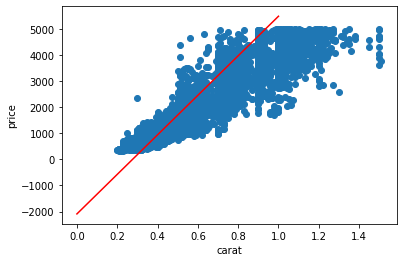

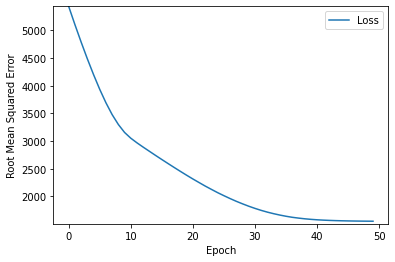

In [209]:
# The following variables are the hyperparameters.
learning_rate = 0.5
epochs = 50
batch_size = 100

# Specify the feature and the label.
my_feature = "carat"  # the total number of rooms on a specific city block.
my_label="price" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Conclusion: with linear regression, we can predict diamond prices based on its carat value. Although we did not reach minimum loss, this model has converged. This could be caused by the large size of data and large variability that makes it difficult for the model to learn from.